# Dragon Raja: Examining Dragon Raja Treasure of Times Drop Rate (Part 2) 
Continuing from the previous part, we found that the probability of getting a hair doubles the probability of getting an outfit. We also found that two sets of fashions have identical drop rates but the identity only holds in aggregate regime. When we take a look at by item droprate, we found that each set has different hair to outfit ratio.

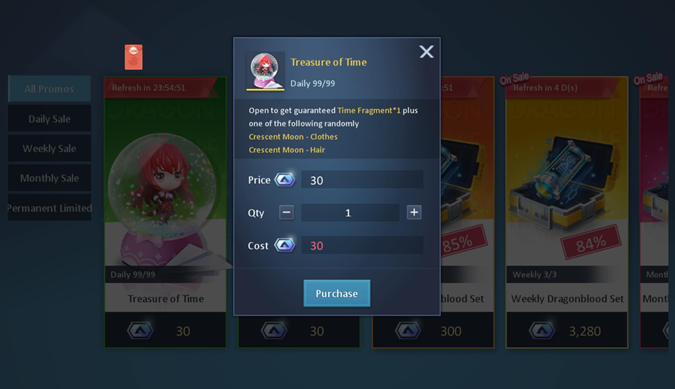

Another question rises, does these facts hold in later banner of Treasure of Times? For this part of the analysis, we will find the trends as time passes.

## Data Preperation

For the analysis, I have performed bootstrap sampling and statistics on total droprates and item droprates for every banner in Treasure of Times and record them in an two excel files. I will load each dataframe when we need

- <code>rate_result</code>: This file contains aggregate level of fashion rates in each banner and its confidence interval
- <code>item_result</code>: This one contains item and set level of fashion items i neach banner

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy import stats

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16,5)

C:\Users\ZeroArtemis\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Load dataframes
rate = pd.ExcelFile('rate_result.xlsx')
rate.sheet_names

['rate', 'lower_ci', 'upper_ci', 'hair_outfit_ratio']

In [3]:
rate_mean = rate.parse('rate')
rate_025 = rate.parse('lower_ci')
rate_975 = rate.parse('upper_ci')

rate_mean.head()

,full_1,full_2,mean,outfit,hair
0,Holy Hymph,Nebula Love,1.106713,0.357281,0.749432
1,Special Dept.,Angel Wings,1.191664,0.487612,0.704051
2,Meow's Joy,Beach Party,1.037017,0.360062,0.676955
3,Star Promise,Shell Wish,1.076130,0.538302,0.537828
4,Dynamic Supernova,Night Spark,1.044168,0.421655,0.622513


## The Analysis

First, let's see the trend by visualizing it.

### Part I: Aggregate Drop Rates

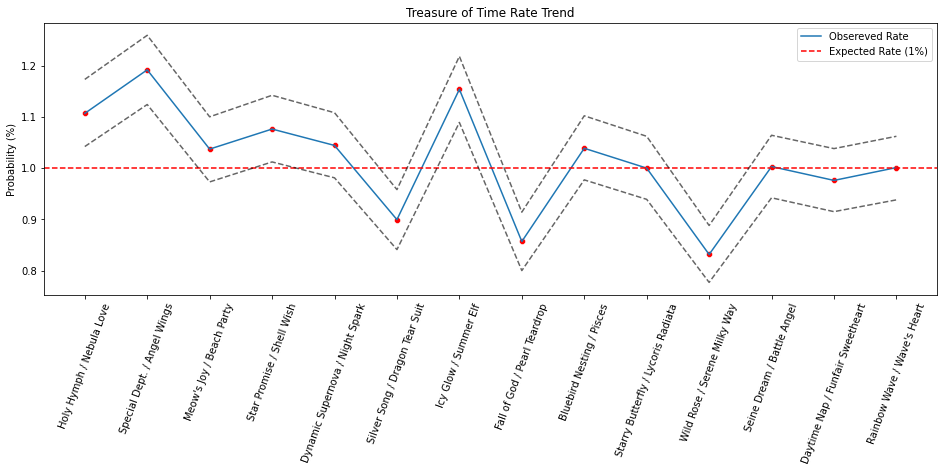

In [40]:
rate_mean['full'] = rate_mean['full_1'] + ' / ' + rate_mean['full_2'] 
banner = rate_mean['full'].values

ax = sns.lineplot(x=banner,y='mean',data=rate_mean)
plt.axhline(1,color='red',linestyle='dashed')

# Set up details
ax.tick_params(axis='x', rotation=70)
plt.title('Treasure of Time Rate Trend')
plt.ylabel('Probability (%)')
plt.legend(['Obsereved Rate','Expected Rate (1%)'])
ax = sns.scatterplot(x=banner,y='mean',data=rate_mean,color='red')

#Plot confidence intervals
ax = sns.lineplot(x=banner,y='agg_pct_025',data=rate_025,color='black',linestyle='dashed',alpha=0.6)
ax = sns.lineplot(x=banner,y='agg_pct_975',data=rate_975,color='black',linestyle='dashed',alpha=0.6)

In [5]:
stats.ttest_1samp(rate_mean['mean'],1)

Ttest_1sampResult(statistic=0.5577382502932319, pvalue=0.5864996820041211)

From the line plot, we can see that the rate used to be higher than 1% during early period. However, as the time passes, the rate was nerfed and fluctuates before coverging to 1%. The t-test further proves that the <b>actual rate might be around 1%</b>

### Part 2: Hair vs Outfit 

For the next part, we will check outfit and hairs distribution. However, the banner outfit and hair rate themselves might not be a great regime to study as the rate may suffer from aggregate rate nerf, making them not a good indicator to compare. I suggest using hair:outfit ratio will be a better option.

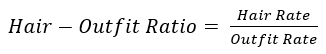

If hairs and outfit rates are identical, they should fluctuate around ratio = 1. If this ratio in one period decreases, it means that outfit has higher chance to come in each draw compare to previous banner.

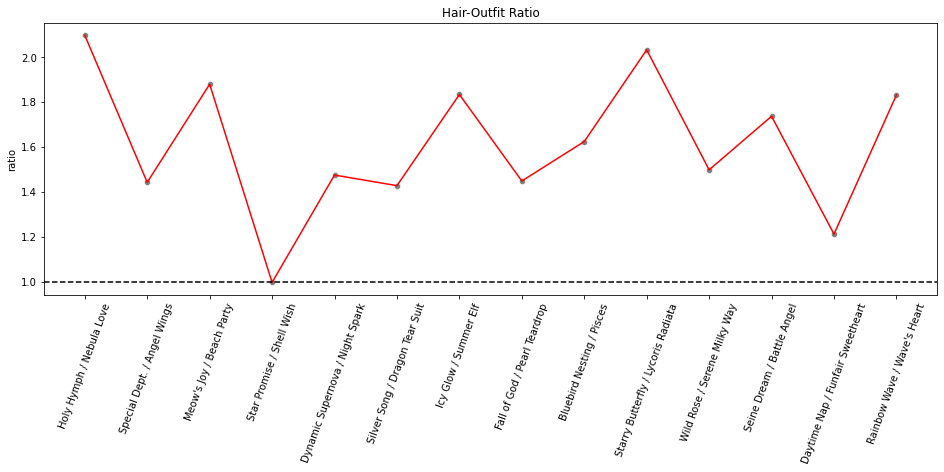

In [6]:
rate_mean['ratio'] = rate_mean['hair'] / rate_mean['outfit'] 

ax = sns.lineplot(x=banner,y='ratio',data=rate_mean,color='red')
plt.axhline(1,color='black',linestyle='dashed')

# Set up details
ax.tick_params(axis='x', rotation=70)
plt.title('Hair-Outfit Ratio')
ax = sns.scatterplot(x=banner,y='ratio',data=rate_mean,color='gray')

Hair rate's dominance still holds over the year. However, the degree of dominance tends to decreases from double to only around 1-4x - 1.8x only. This means there's more chance to get outfit giving the you get a fashion compared to the old days.

But look that the last banner, no wonder I get so many hairs! i want to cry...

### Part 3: Diving Deeper...
If you remember from the last part, hair and outfit have different set:set ratio. If hair from one set dominates another hair, the opposite happens to its outfit counterpart. Let's take a look at Set/Set Ratio by each part of fashion item.

For this part, we will use the data from <code>item_result</code> file which contains rate for each item in each banner and their confidence intervals

In [7]:
# Load dataframes
indiv = pd.ExcelFile('item_result.xlsx')
indiv.sheet_names

['rate', 'hair_ci', 'outfit_ci']

In [8]:
for sheet in indiv.sheet_names:
    text = 'indiv_' + sheet
    globals()[text] = indiv.parse(sheet)

In [9]:
indiv_rate.head()

,full_1,full_2,mean_outfit1,mean_outfit2,mean_hair1,mean_hair2
0,Holy Hymph,Nebula Love,0.136375,0.221175,0.408660,0.340595
1,Special Dept.,Angel Wings,0.162372,0.324935,0.325103,0.379063
2,Meow's Joy,Beach Party,0.126979,0.232777,0.444231,0.232725
3,Star Promise,Shell Wish,0.239317,0.298768,0.318871,0.219361
4,Dynamic Supernova,Night Spark,0.180670,0.240986,0.381794,0.241006


For the sake of simplicy, we will call the first set in the banner as ' Set 1' and second one as ' Set 2 '. In this part, we will see the dynamics of outfit and hair proportion given fashion items were drawn. By applying Bayes's Rule, we get the following formula.
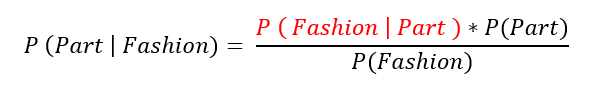

However, as outfit and hair are subsets of fashion item, the red part is simplified to 1, leaving the formula with only probability of getting specific part over probability of getting fashion items.

In [18]:
# Calculate probabilities
indiv_rate['p_fashion'] = indiv_rate.sum(axis=1)

indiv_rate['p_outfit1'] = indiv_rate['mean_outfit1'] / indiv_rate['p_fashion']
indiv_rate['p_outfit2'] = indiv_rate['mean_outfit2'] / indiv_rate['p_fashion']
indiv_rate['p_hair1'] = indiv_rate['mean_hair1'] / indiv_rate['p_fashion']
indiv_rate['p_hair2'] = indiv_rate['mean_hair2'] / indiv_rate['p_fashion']

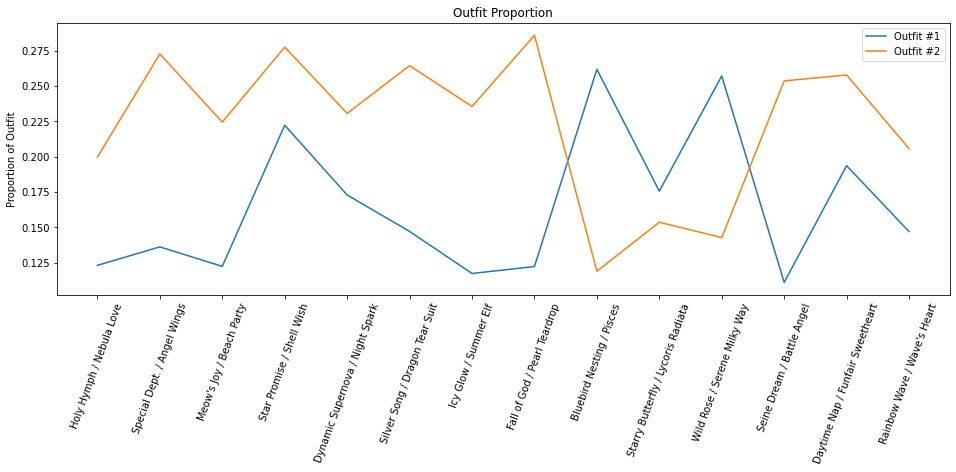

In [42]:
ax = sns.lineplot(x=banner,y='p_outfit1',data=indiv_rate)
ax = sns.lineplot(x=banner,y='p_outfit2',data=indiv_rate)

ax.tick_params(axis='x', rotation=70)

plt.title('Outfit Proportion')
plt.ylabel('Proportion of Outfit')
plt.legend(['Outfit #1','Outfit #2'])


In [36]:
stats.f_oneway(indiv_rate['p_outfit1'],indiv_rate['p_outfit2'])

F_onewayResult(statistic=8.70595428488231, pvalue=0.006633352422282361)

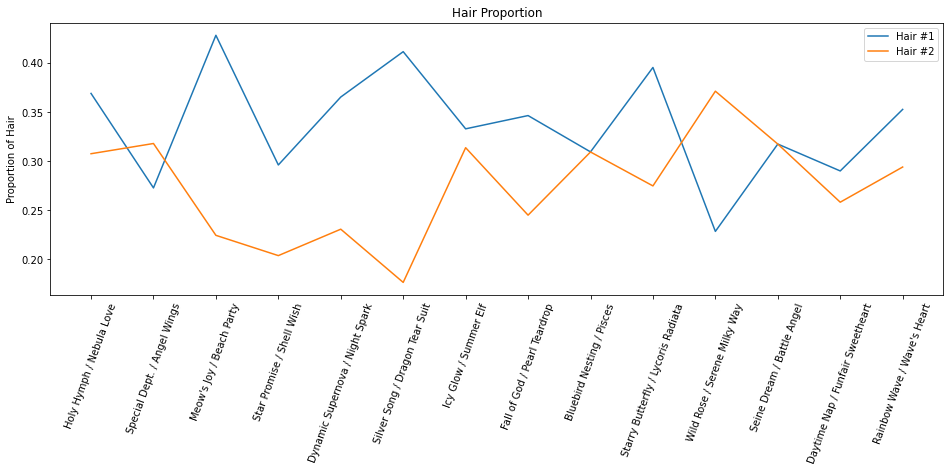

In [38]:
ax = sns.lineplot(x=banner,y='p_hair1',data=indiv_rate)
ax = sns.lineplot(x=banner,y='p_hair2',data=indiv_rate)
ax.tick_params(axis='x', rotation=70)

plt.title('Hair Proportion')
plt.ylabel('Proportion of Hair')
plt.legend(['Hair #1','Hair #2'])

In [35]:
stats.f_oneway(indiv_rate['p_hair1'],indiv_rate['p_hair2'])

F_onewayResult(statistic=9.045993236307659, pvalue=0.005777028091114574)

From the trend, we can see that hair and outfit proportion do have inverse relationship. If EVA increases the chance of getting outfit, it will surpress outfit chances. Moreover, we can see difference in outfit-hair proportion. Set-1 outfit tends to have lower rate compared Set-2 Outfit while the hair rates tends to reverse the relationship. 

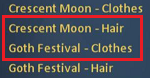

Bringing back the Treasure of Time format, we might say that <b>second and third entry have higher chance to come than its counterpart</b> in both set and part category. This is an interesting insights and it matches my experience. I see the cross-combo very often during my time playing the game.

But, what's the individual item drop rate?, you may ask. This is the results:

In [14]:
columns = {'Part': ['Outfit', 'Hair'],'Set': ['1', '2'], }
means = []

order = columns.keys()
sum_df = pd.DataFrame(itertools.product(*[columns[k] for k in order]), columns=order)

array = indiv_rate.loc[:,'mean_outfit1':]
for column in array:
    means.append(np.mean(array[column]))

In [15]:
sum_df['rate'] = means
sum_df.round(4)

,Part,Set,rate
0,Outfit,1,0.1663
1,Outfit,2,0.2272
2,Hair,1,0.3423
3,Hair,2,0.2795


## Conclusion

From the analysis, we found that:

1. The rate seems to be lowered, coverging to 1% as time passes
2. The fact that hair droprate is higher than outfit droprate still holds, but with lower magnitude.
3. Hair from Set-1 and Outfit from Set-2 tends to have higher droprate than its counterpart

After these results, is Treasure of Time still worthy? I will say depends on person's judgement. But for me, after knowing the droprates. It's easier to decide. In the next bonus part, let's discuss whether it worth to invest in Treasure of Times compare to other events. Using Statistics of course!